# 데이터 시각화 분석

### 월별, 연령대별 본인부담비용 시각화 분석

In [1]:
import pandas as pd

In [11]:
df_month_age_any = pd.read_excel(".////files_new/////df_month_age_any_월별연령대별본인부담비용.xlsx")

In [12]:
df_month_age_any.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   수진자연령    5631 non-null   int64 
 1   요양개시일자   5631 non-null   int64 
 2   심결본인부담금  5631 non-null   int64 
 3   연령대      5631 non-null   object
 4   월        5631 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 220.1+ KB


In [13]:
df_month_age_any.head(5)

,수진자연령,요양개시일자,심결본인부담금,연령대,월
0,3,20131211,2900,9세이하,12
1,6,20130129,2800,9세이하,1
2,3,20130130,2700,9세이하,1
3,6,20130130,6500,9세이하,1
4,6,20130502,2800,9세이하,5


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 월별로 병원을 많이 찾는 연령대 분석하기
# 피봇 이용
# 월별/ 연령대별 수진자연령의 빈도표
pivot_month_age = df_month_age_any.pivot_table(values = "수진자연령",
                             index  = "월",
                             columns= "연령대",
                             aggfunc= "count")

In [27]:
# 90대의 NAN값을 0으로 변환
pivot_month_age = pivot_month_age.fillna(0)
pivot_month_age.fillna(0, inplace = True)
pivot_month_age

연령대,10대,20대,30대,40대,50대,60대,70대,80대,90대,9세이하
월,,,,,,,,,,
1,39.0,15.0,40.0,52.0,108.0,95.0,76.0,9.0,2.0,52.0
2,28.0,26.0,39.0,45.0,69.0,63.0,78.0,6.0,0.0,53.0
3,34.0,33.0,33.0,43.0,67.0,111.0,91.0,15.0,0.0,70.0
4,36.0,22.0,44.0,53.0,71.0,81.0,72.0,4.0,3.0,59.0
5,35.0,30.0,34.0,50.0,75.0,109.0,94.0,16.0,0.0,53.0
6,23.0,15.0,30.0,52.0,55.0,110.0,80.0,11.0,1.0,36.0
7,31.0,21.0,34.0,69.0,71.0,108.0,78.0,11.0,1.0,52.0
8,32.0,17.0,28.0,52.0,86.0,89.0,74.0,6.0,1.0,73.0
9,38.0,26.0,35.0,57.0,64.0,81.0,90.0,6.0,1.0,62.0


## 선그래프

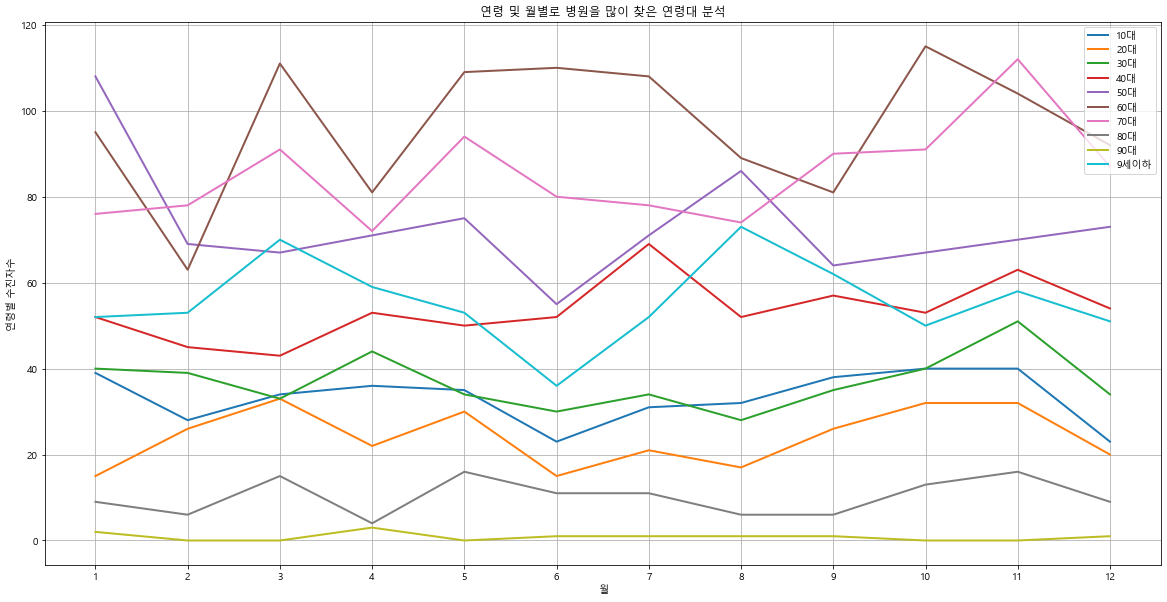

In [29]:
# 그래프 크기 지정하기 (너비, 높이)
plt.rcParams["figure.figsize"] = (20, 10)
# 선의 두께 지정
plt.rcParams["lines.linewidth"] = 2
# 폰트지정
plt.rc("font", family="Malgun Gothic", size=10)

# 데이터 넣기
pivot_month_age.plot()

# y축 이름
plt.ylabel("연령별 수진자수")
# x축 표시할 눈금 범위 지정
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# 그래프 제목
plt.title("연령 및 월별로 병원을 많이 찾은 연령대 분석")
# 그래프에 grid 선 그리기
plt.grid(True)
# 범례 표시하기
plt.legend(loc="upper right")
# 보여줘~~~~
plt.show()

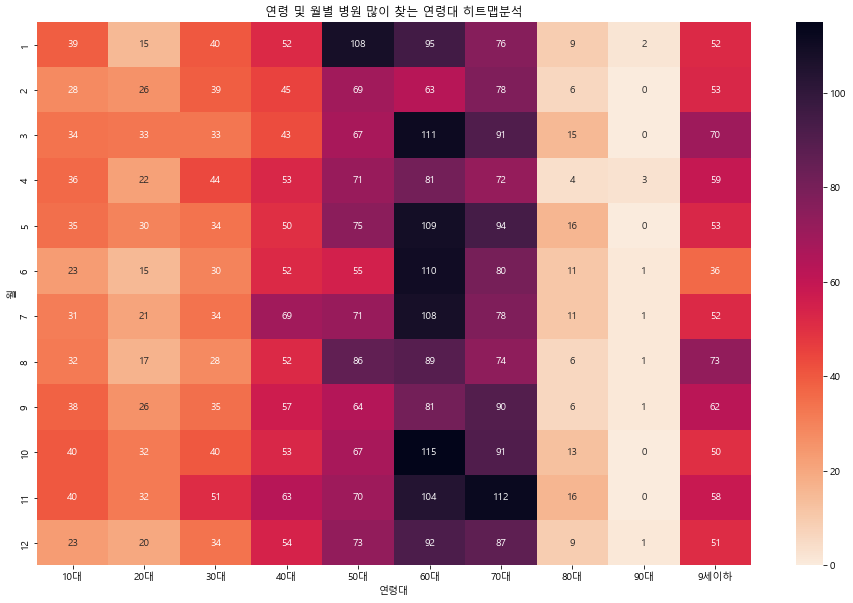

In [32]:
# 히트맵 그리기
plt.figure(figsize=(16,10))
sns.heatmap(pivot_month_age, annot=True, fmt=".0f", cmap="rocket_r")
plt.title("연령 및 월별 병원 많이 찾는 연령대 히트맵분석")
plt.show()